Insurance claim fraud detection

In [519]:
import pandas as pd      # commonly used for data manipulation and analysis

In [520]:
df = pd.read_csv('insurance_claims.csv')

In [521]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [522]:
df.dtypes      # It is used to display the data types of each column in a pandas DataFrame object

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [523]:
df.columns      # returns the label of each column in the DataFrame. It is used to get a list of columns from the DataFrame header

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [524]:
df.shape

(1000, 39)

In [525]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [526]:
from matplotlib import pyplot as plt      
import seaborn as sns     

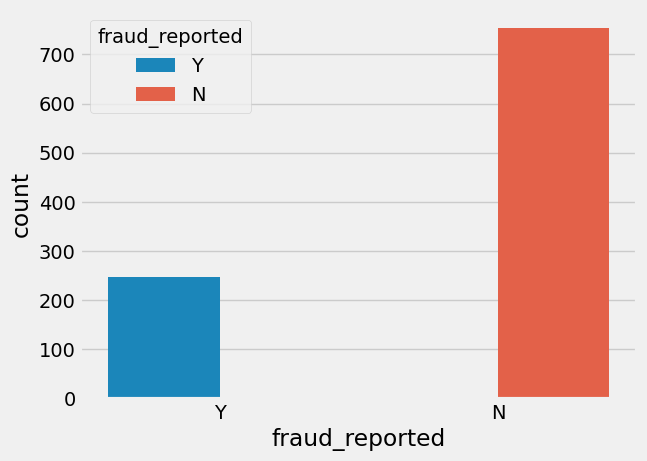

In [527]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [528]:
df['fraud_reported'].value_counts()      # Count number of frauds vs non-frauds

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [529]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

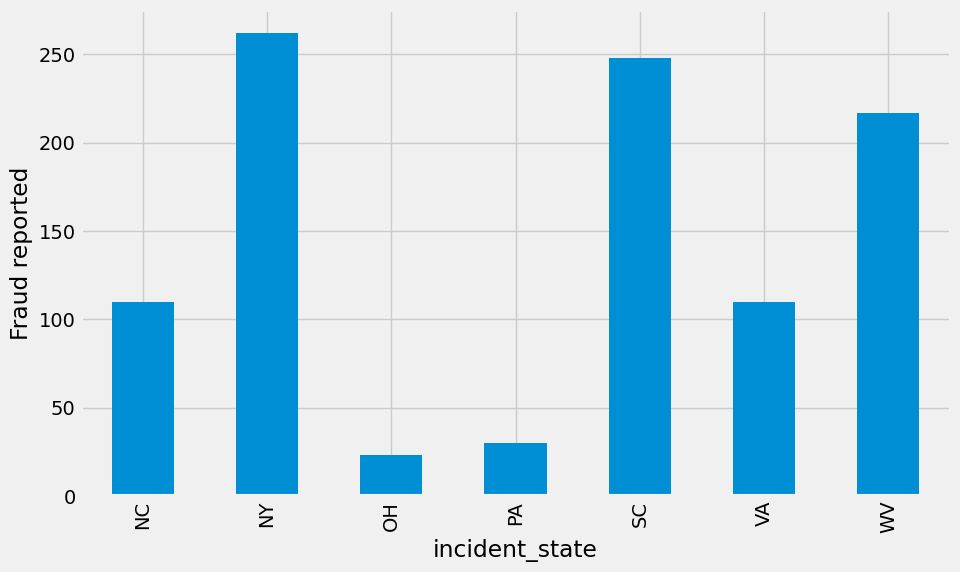

In [530]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()  

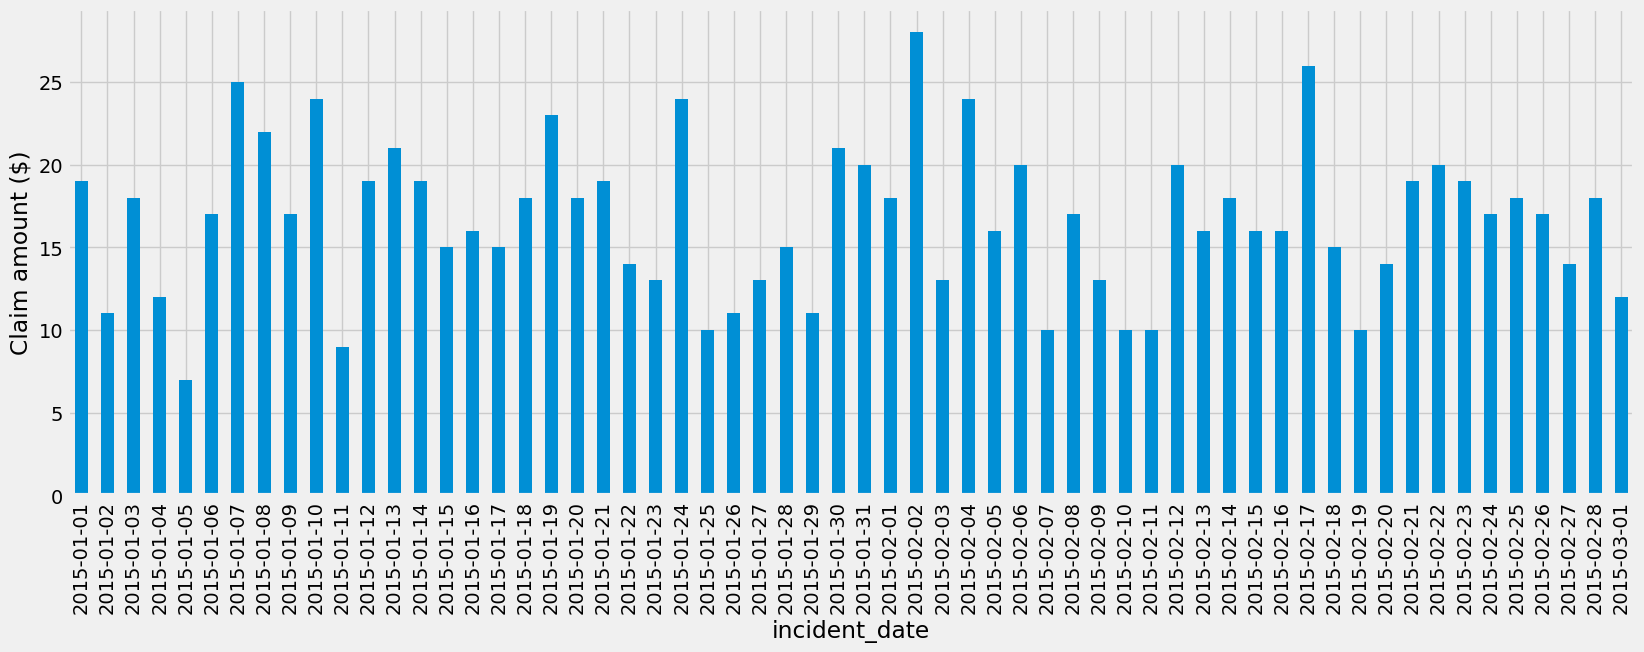

In [531]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

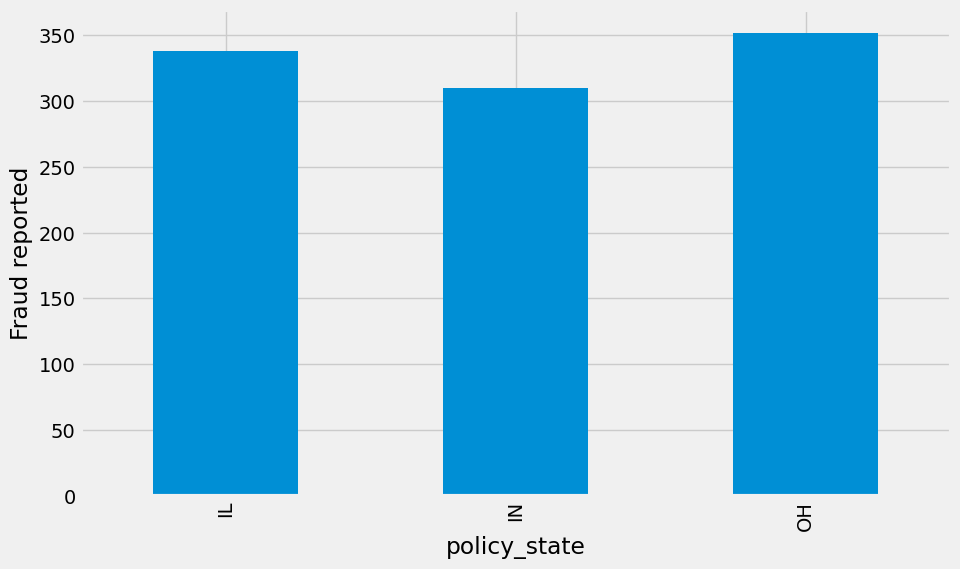

In [532]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

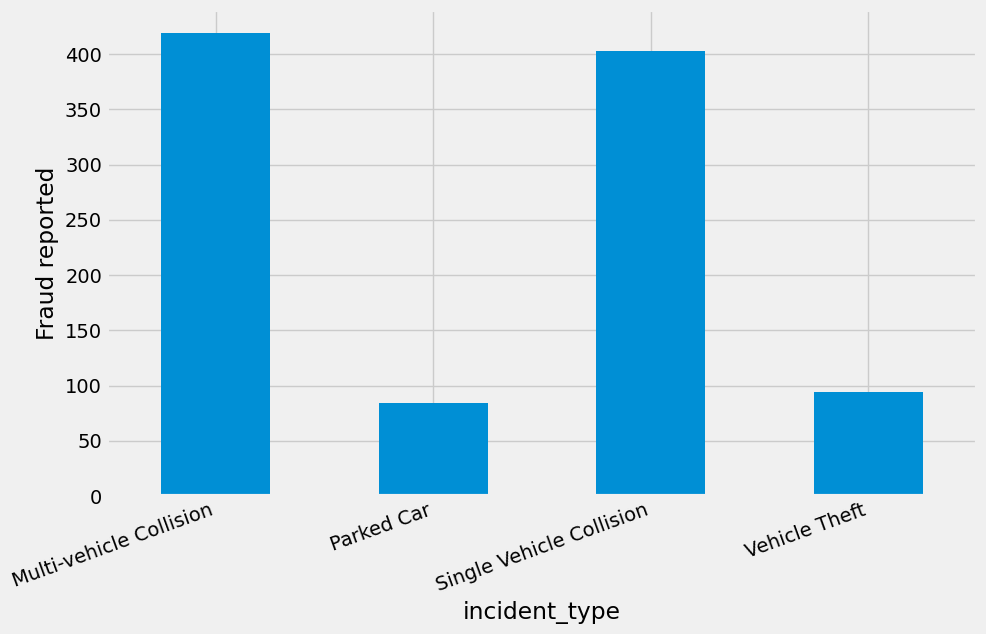

In [533]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

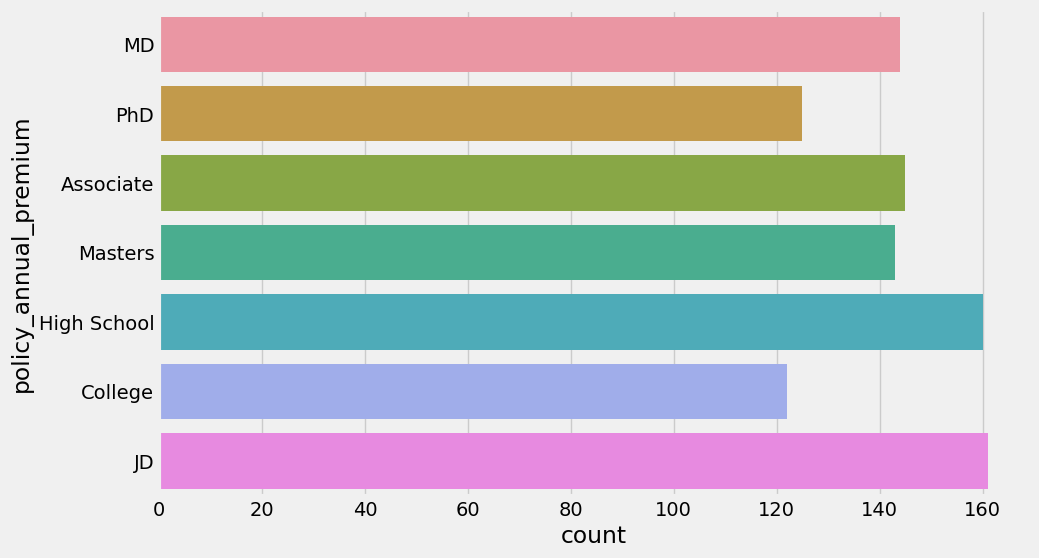

In [534]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

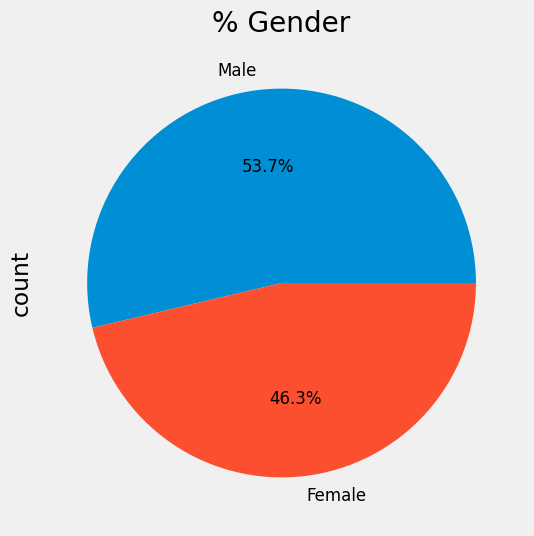

In [535]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

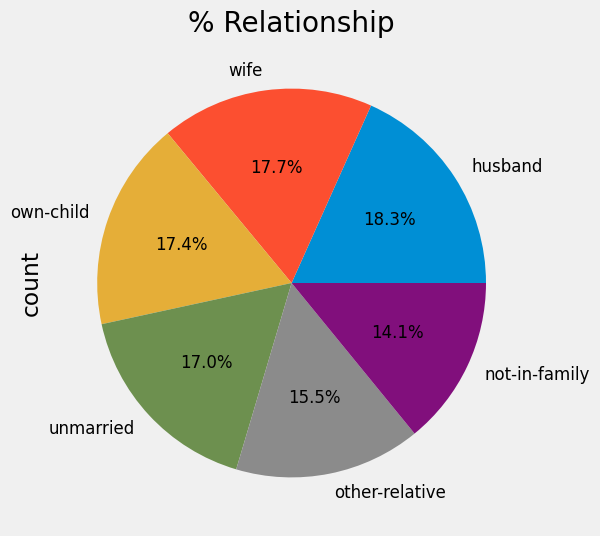

In [536]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

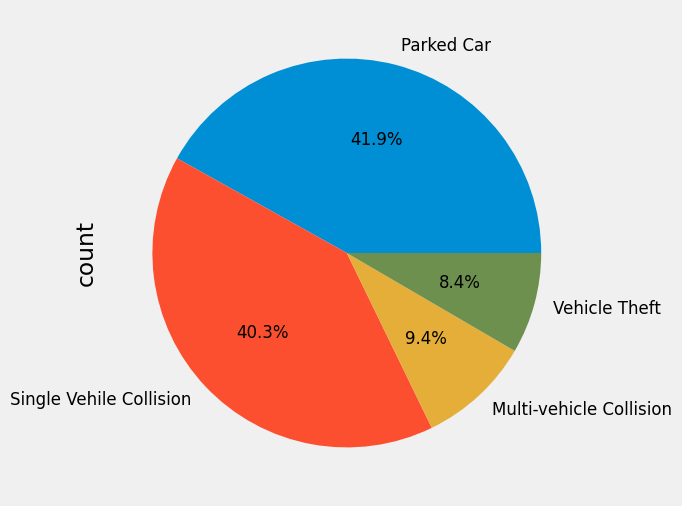

In [537]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'], fontsize=12) 

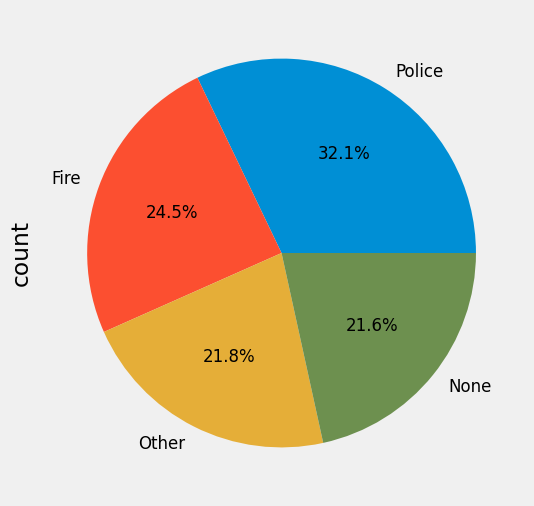

In [538]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'], fontsize=12) 

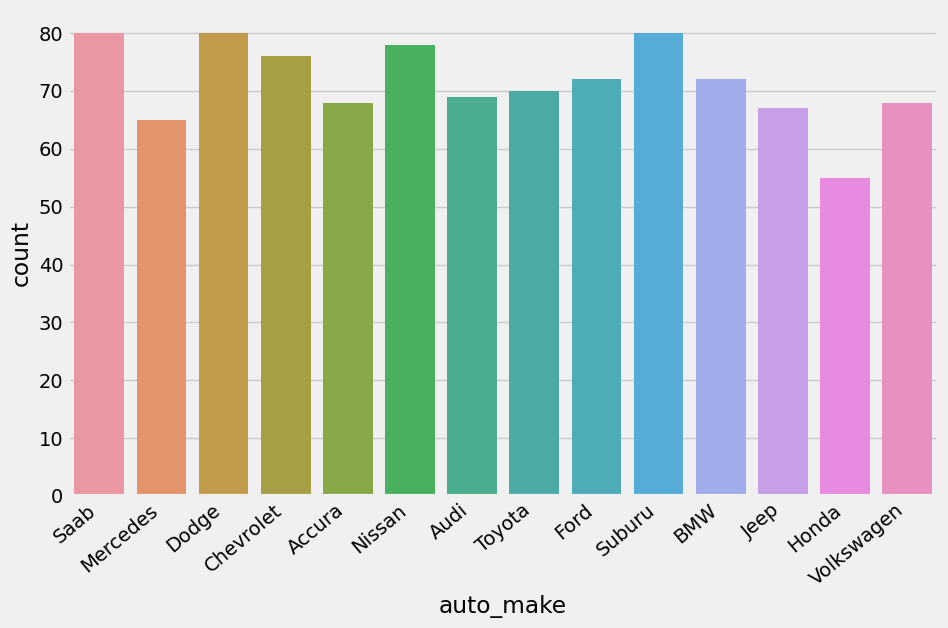

In [539]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

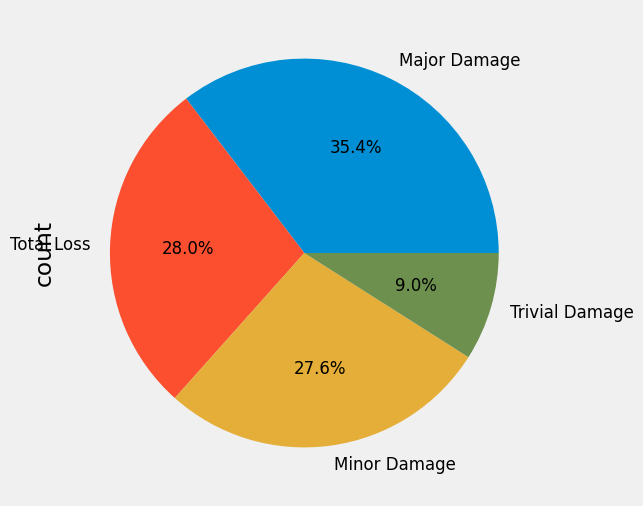

In [540]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'], fontsize=12)  

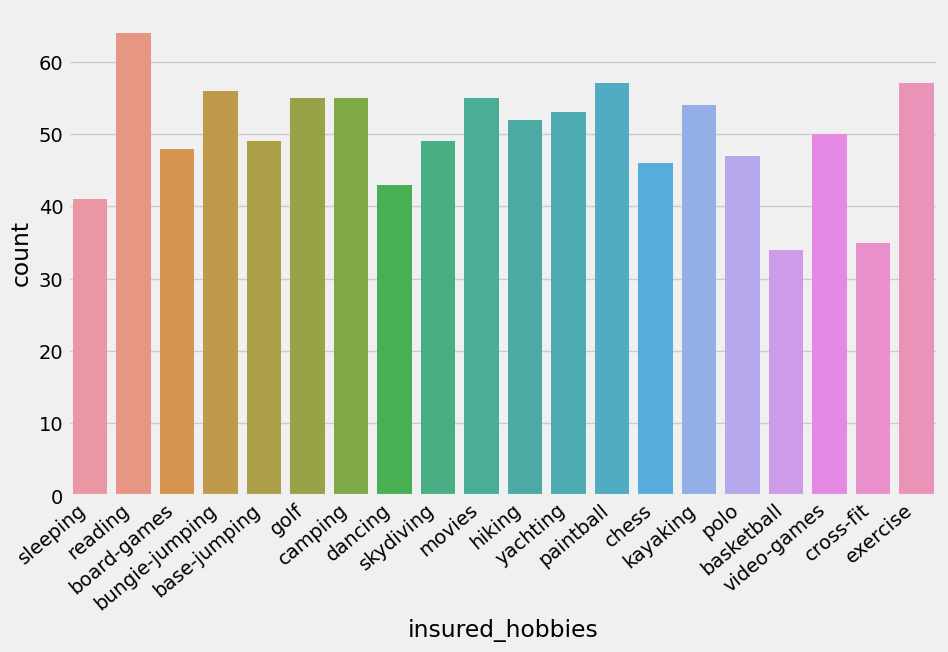

In [541]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [542]:
df["insured_occupation"].value_counts()

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

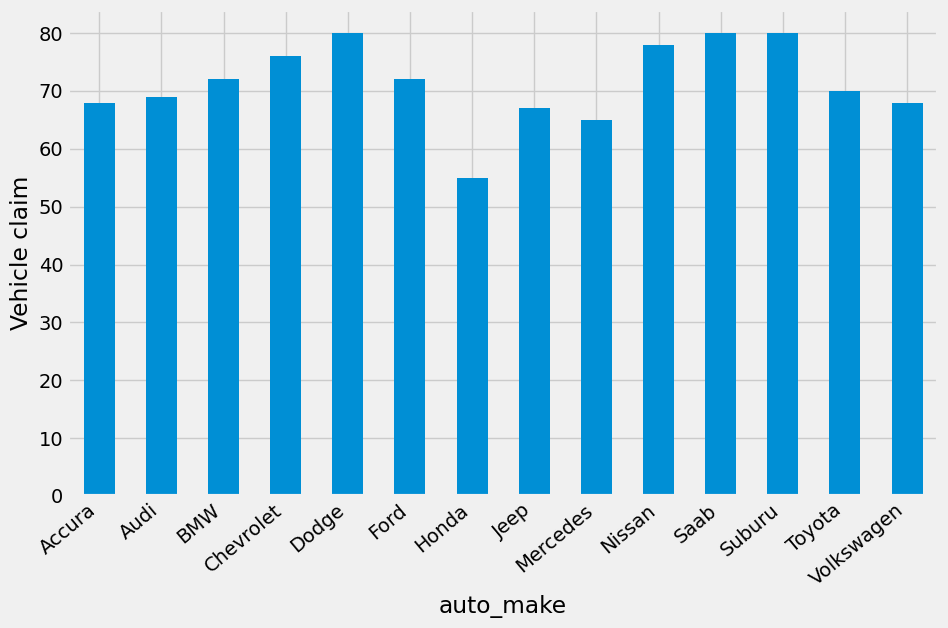

In [543]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

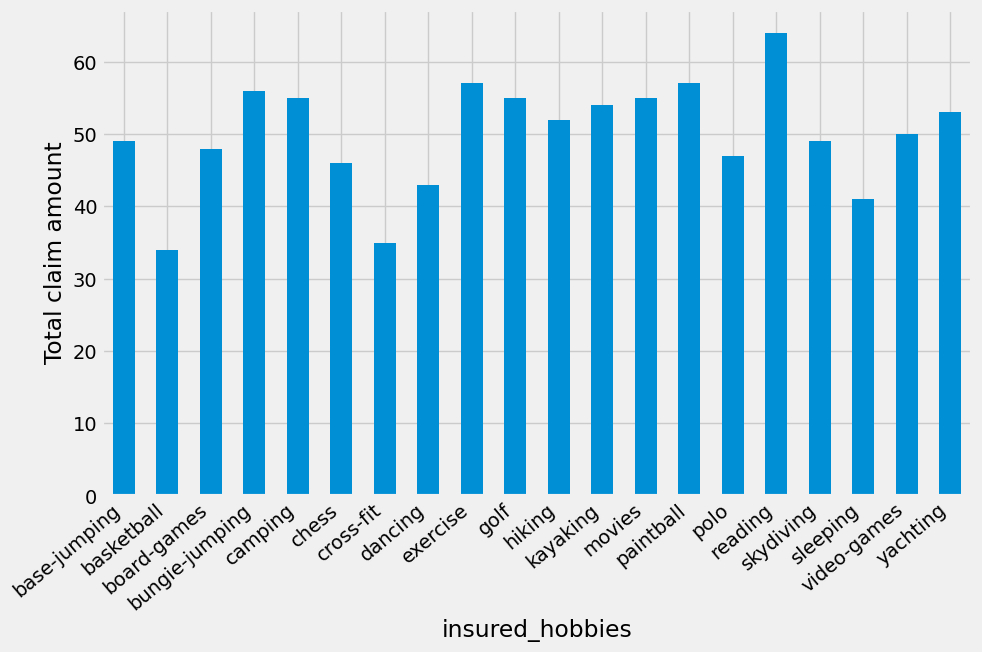

In [544]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Data Processing

In [545]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [546]:
import numpy as np     # used for numerical operations and array manipulations

In [547]:
df.replace('?', np.nan, inplace=True)     # replace values denoted by '?' i.e missing values with np.nan

In [548]:
# count missing values for each column
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

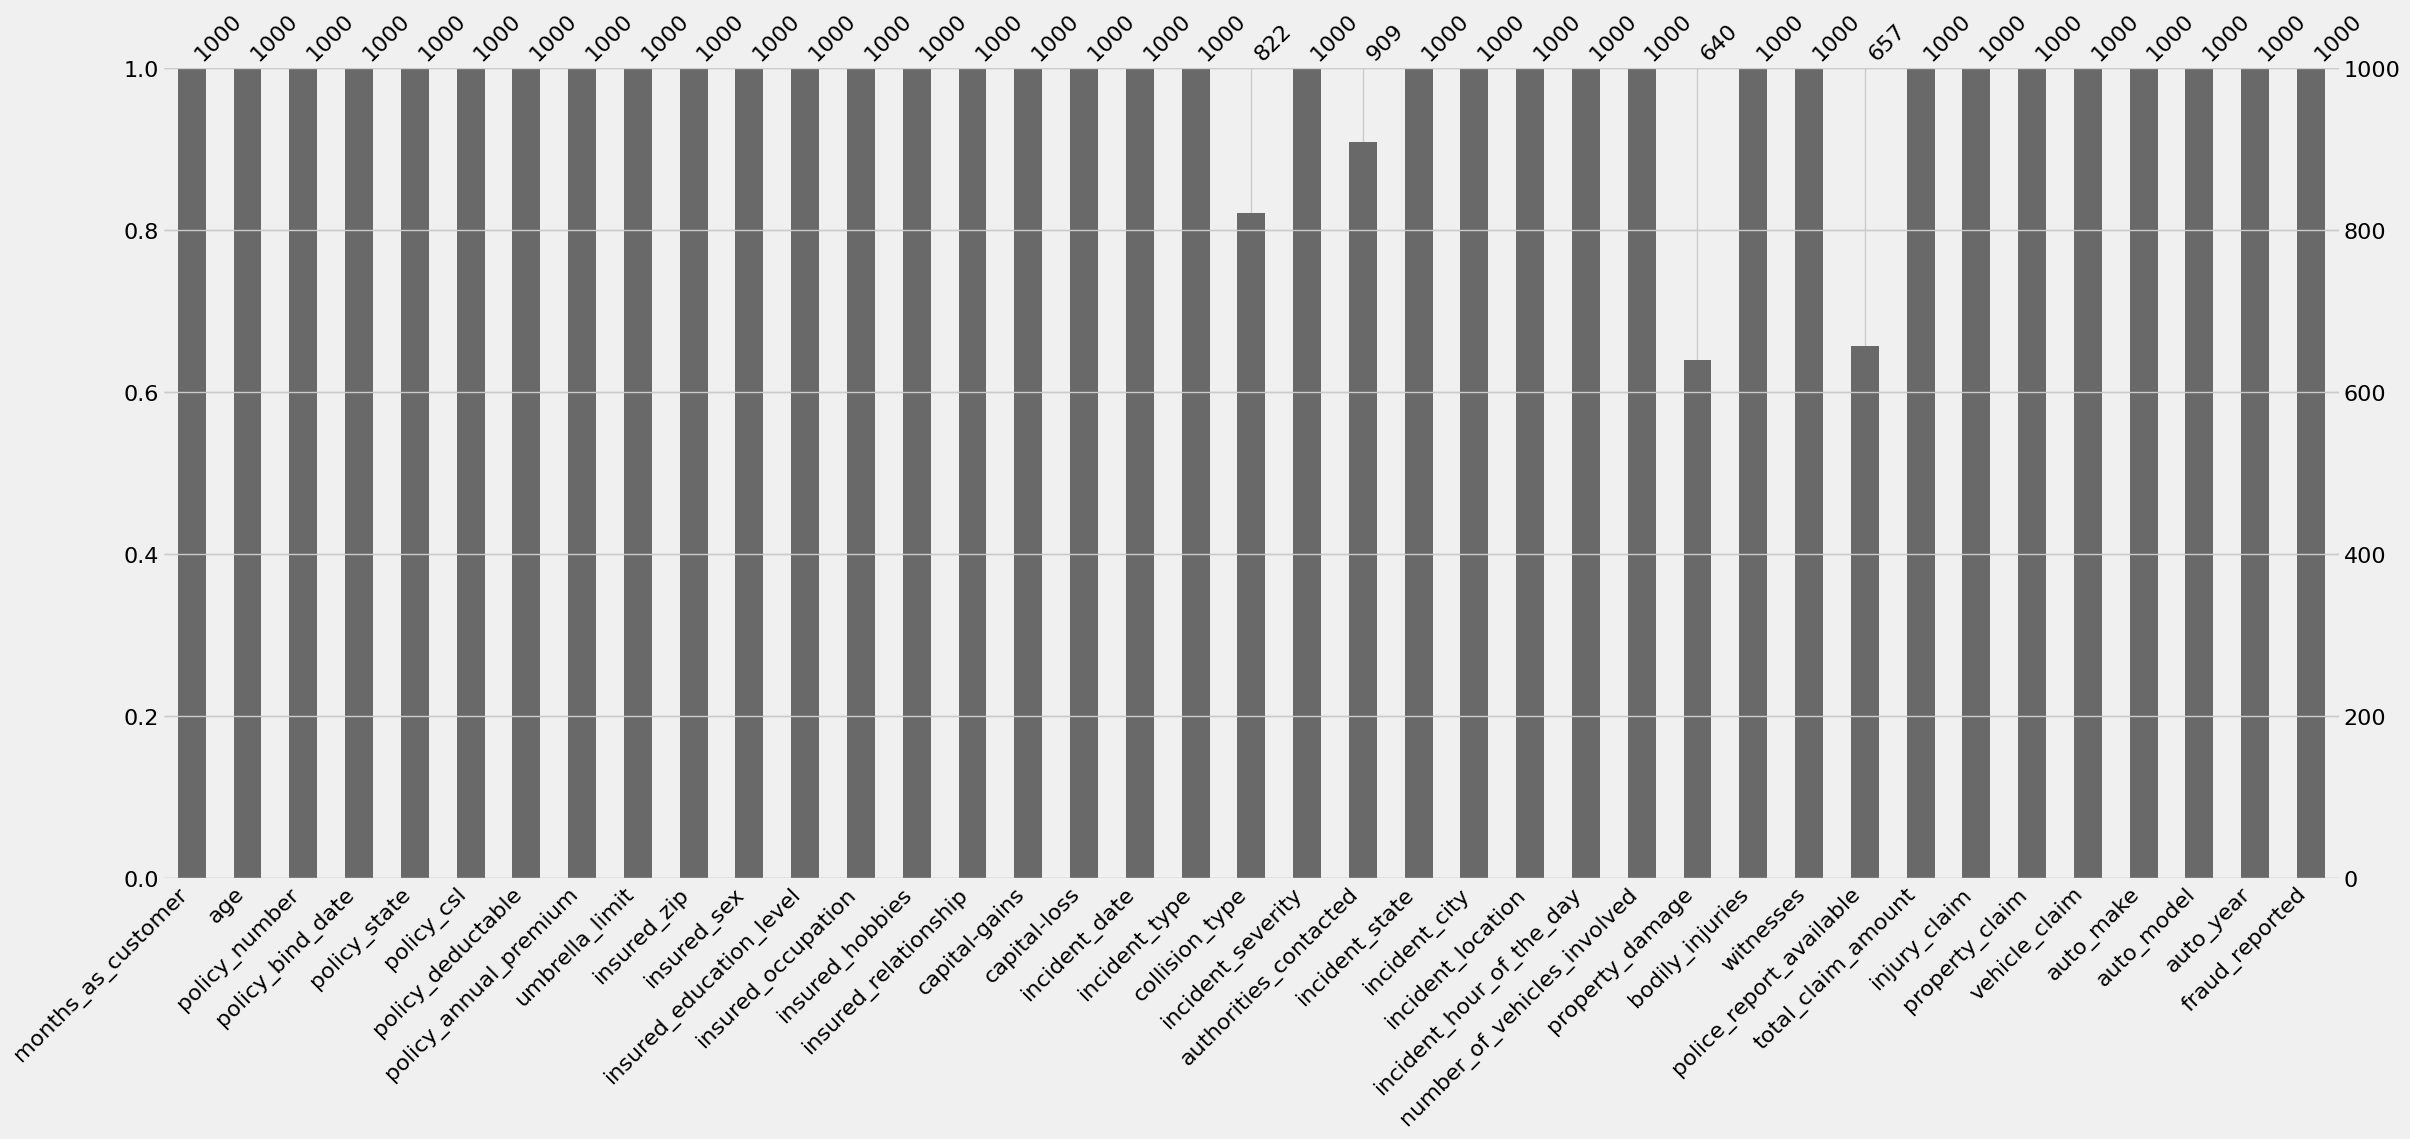

In [549]:
import missingno as msno     # used for visualizing and analyzing missing data in datasets

msno.bar(df)
plt.show()

Handle the missing values

In [550]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [551]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [552]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [553]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [554]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [555]:
df['vehicle_age'] = 2018 - df['auto_year']     # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [556]:
df.select_dtypes(include=['object']).columns     # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [557]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [558]:
to_drop = ['policy_number','policy_bind_date','insured_zip','incident_location','incident_date'
           ,'insured_hobbies','auto_make','auto_model','auto_year','policy_state', 'incident_state', 'incident_city']

df.drop(to_drop, inplace = True, axis = 1)
df.head(2)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,YES,1,2,YES,71610,6510,13020,52080,1,14
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,NO,0,0,NO,5070,780,780,3510,1,11


In [559]:
df.select_dtypes(include=['object']).columns     # checking categorcial columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

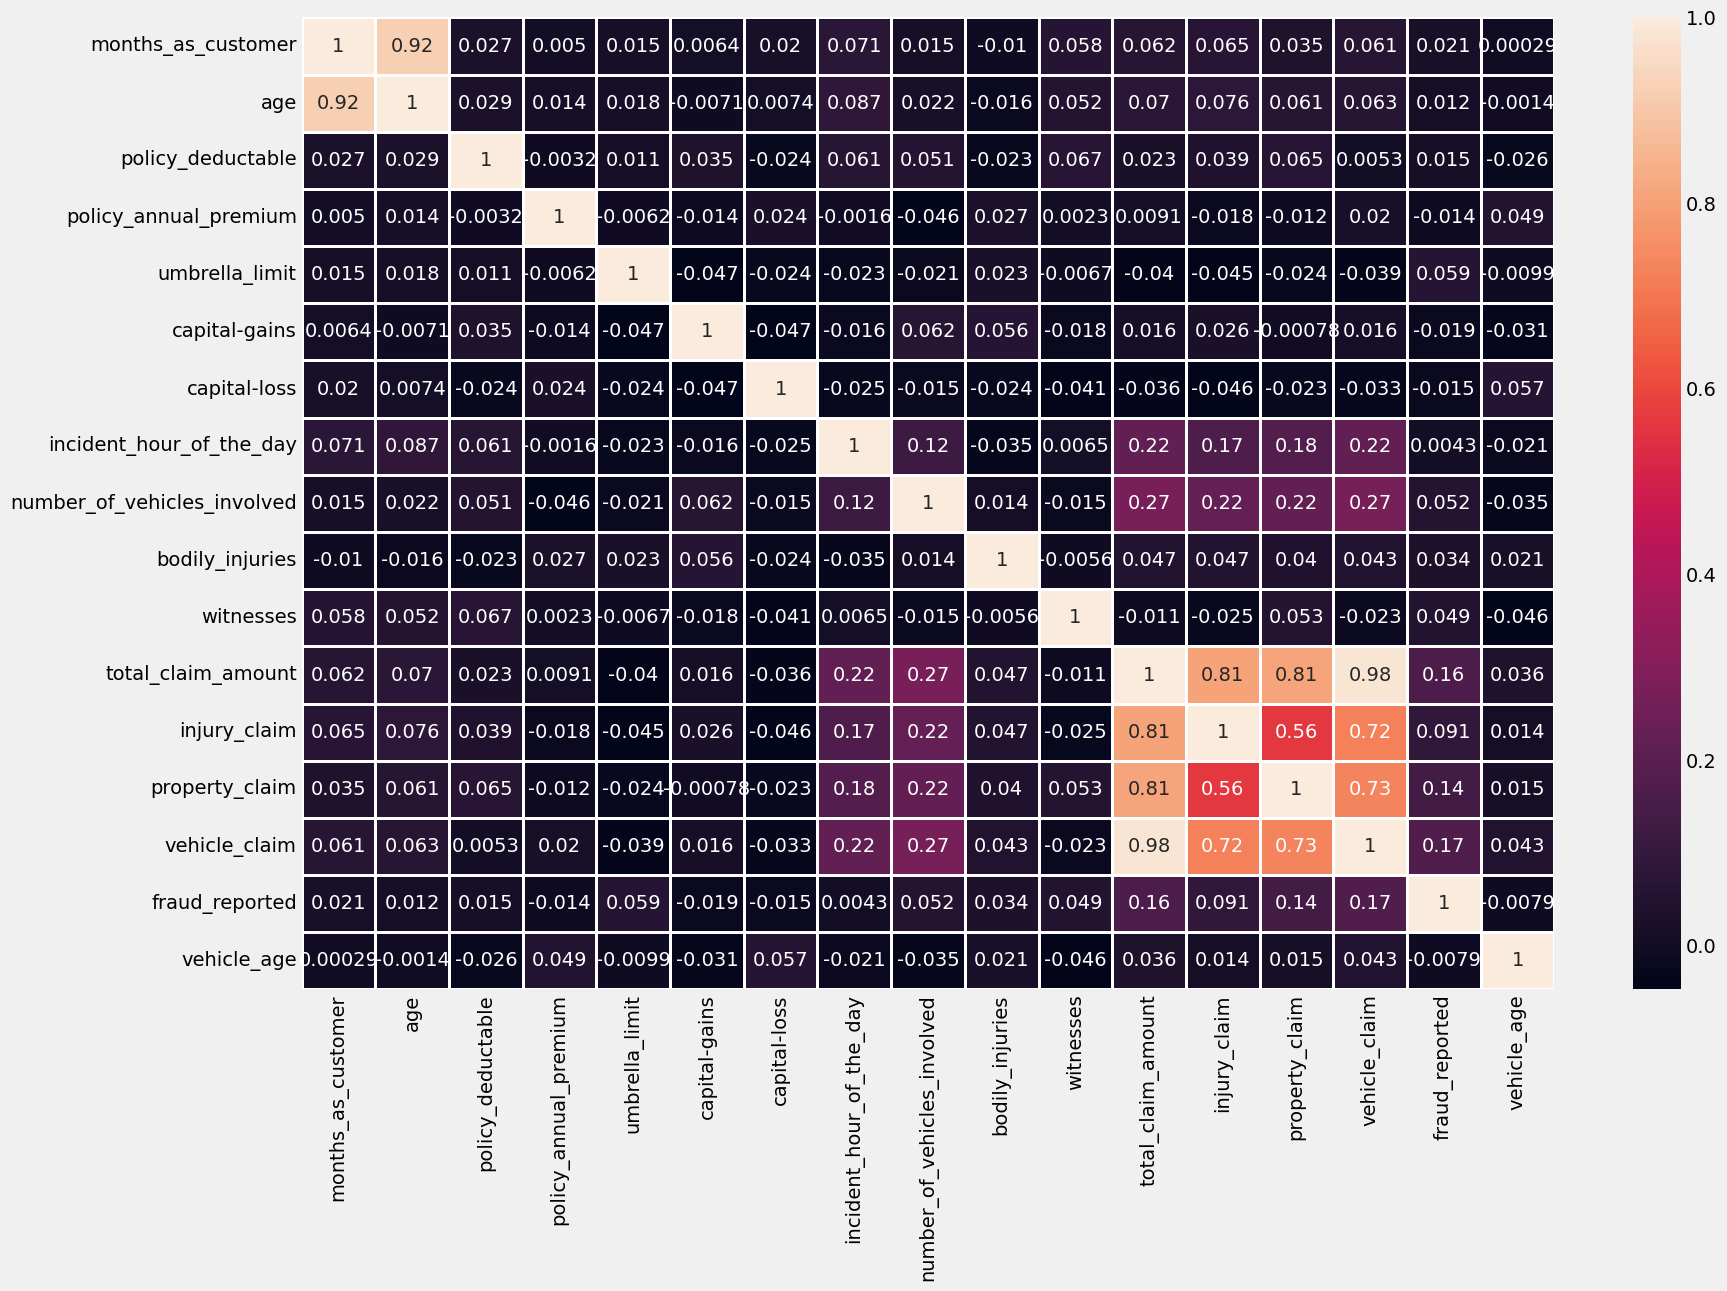

In [560]:
# Heatmap
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical columns
corr = numeric_df.corr()

plt.figure(figsize=(18, 12))

sns.heatmap(data=corr, annot=True, fmt='.2g', linewidths=1)
plt.show()

In [561]:
# Drop the columns with high correlation
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head(2)

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,6510,13020,52080,1,14
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,780,780,3510,1,11


In [562]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]    
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [563]:
df.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [564]:
to_drop = ['incident_hour_of_the_day']   
df.drop(to_drop, inplace = True, axis = 1)

In [565]:
df.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [566]:
df.shape

(1000, 26)

In [567]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

Encoding Categorical columns

In [568]:
cat_df = X.select_dtypes(include = ['object'])     # shift categorical columns to new df

In [569]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,incident_period_of_day
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,early_morning
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,morning
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,morning
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,early_morning
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,evening


In [570]:
for col in cat_df.columns:     # iterates through each column in the cat_df
    print(f"{col}: \n{cat_df[col].unique()}\n")    

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']

incident_period_of_day: 
['early_morning' 'morning' 'evening' 'past_midnight' 

In [571]:
cat_df = pd.get_dummies(cat_df, drop_first = True)     # applies one-hot encoding to the categorical columns in the DataFrame cat_df

In [572]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,True,False,True,False,False,False,True,False,False,False,...,False,True,True,True,True,False,False,False,False,False
1,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,True,False,False,True,False,False,False,False,False
4,False,True,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [573]:
cat_df.replace({False:0 , True:1}, inplace=True)    
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,1,0,1,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [574]:
num_df = X.select_dtypes(include=['int64'])     # df for numerical coulmns

In [575]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,vehicle_age
0,328,1000,0,53300,0,1,1,2,6510,13020,52080,14
1,228,2000,5000000,0,0,1,0,0,780,780,3510,11
2,134,2000,5000000,35100,0,3,2,3,7700,3850,23100,11
3,256,2000,6000000,48900,-62400,1,1,2,6340,6340,50720,4
4,228,1000,6000000,66000,-46000,1,0,1,1300,650,4550,9


In [576]:
X = pd.concat([num_df, cat_df], axis=1)
X.head(10)

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,1000,0,53300,0,1,1,2,6510,13020,...,0,1,1,1,1,0,0,0,0,0
1,228,2000,5000000,0,0,1,0,0,780,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,3,2,3,7700,3850,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,1,1,2,6340,6340,...,0,1,0,0,1,0,0,0,0,0
4,228,1000,6000000,66000,-46000,1,0,1,1300,650,...,0,1,0,0,0,1,0,0,0,0
5,256,1000,0,0,0,3,0,2,6410,6410,...,0,0,0,0,0,1,0,0,0,0
6,137,1000,0,0,-77000,3,0,0,21450,7150,...,0,1,0,0,0,0,0,0,0,1
7,165,1000,0,0,0,3,2,2,9380,9380,...,0,1,0,1,0,0,0,0,1,0
8,27,500,0,0,0,1,1,1,2770,2770,...,0,1,0,1,0,0,0,0,1,0
9,212,500,0,0,-39300,1,2,1,4700,4700,...,1,0,0,0,0,0,0,0,0,0


Outliers Detection + scaling performed

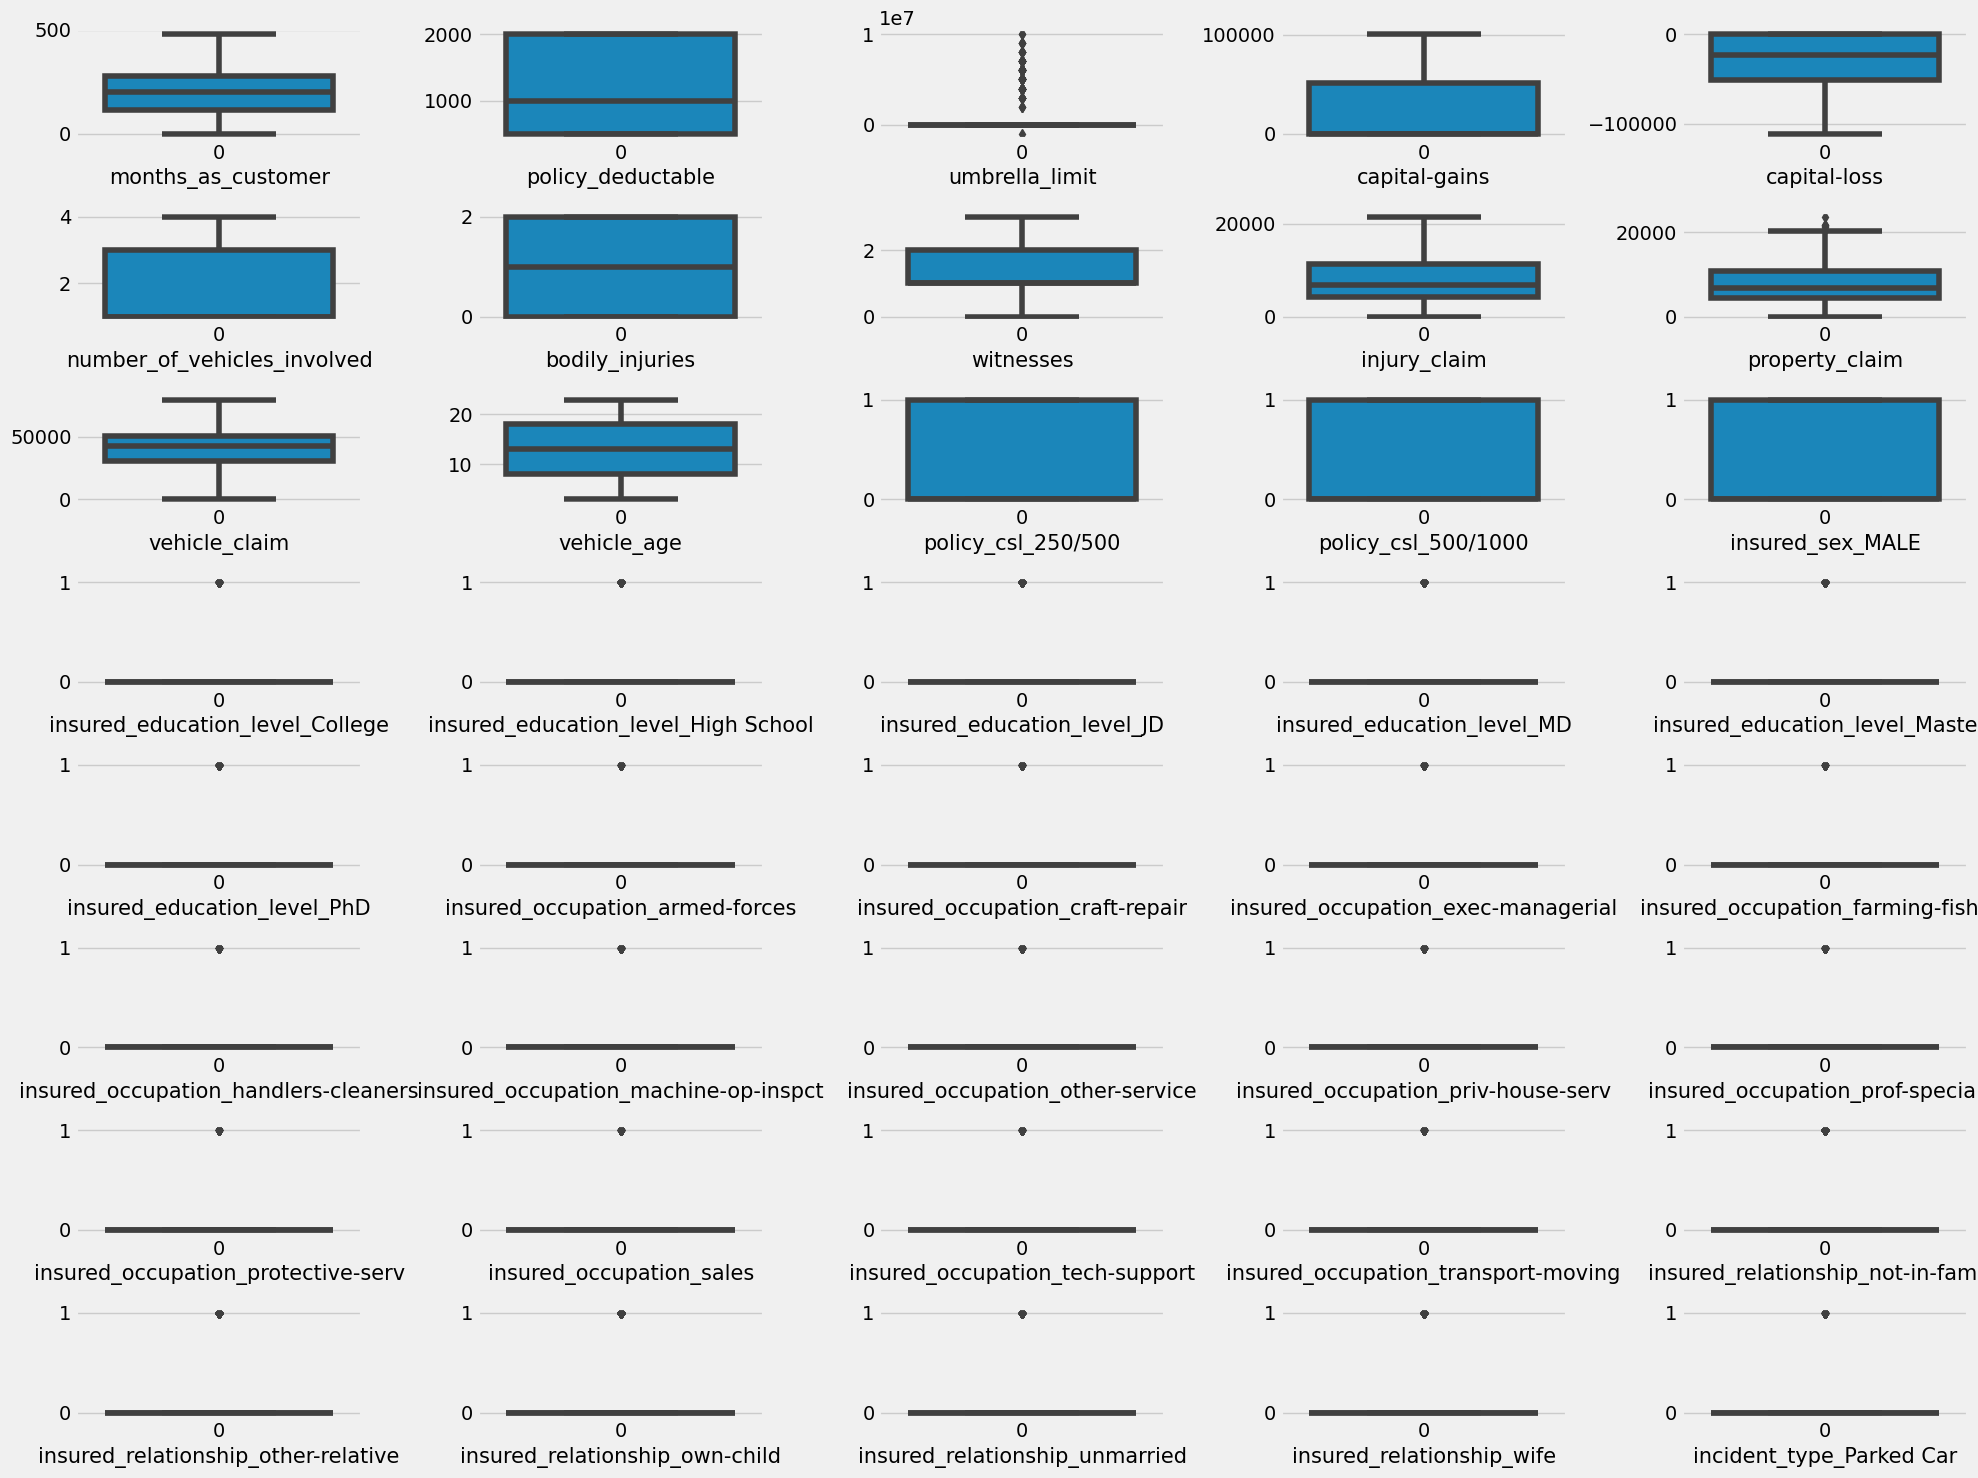

In [577]:
plt.figure(figsize = (20, 15))
plotnumber = 1    

for col in X.columns:
    if plotnumber <= 40:     
        ax = plt.subplot(8, 5, plotnumber)     
        sns.boxplot(X[col])   
        plt.xlabel(col, fontsize = 15)    
    
    plotnumber += 1    
plt.tight_layout()   
plt.show()     

Outliers are present in some numerical columns we will scale numerical columns later

In [578]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [579]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
545,131,1000,0,65700,0,1,1,3,15280,7640,...,0,0,0,0,1,0,0,0,0,0
232,235,500,0,39900,-60200,4,2,1,6910,6910,...,1,0,0,1,0,0,0,1,0,0
976,143,1000,0,38400,-5700,3,2,2,14080,7040,...,0,0,0,0,0,0,0,0,0,0
797,136,1000,0,37900,0,1,0,1,3070,6140,...,0,0,1,1,0,0,0,0,1,0
454,126,2000,0,46500,-42700,1,2,3,4430,4430,...,1,0,0,0,0,0,0,0,1,0


In [580]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit','capital-gains', 'capital-loss', 'number_of_vehicles_involved', 
                  'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim','vehicle_age']]

In [581]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()     
scaled_data = scaler.fit_transform(num_df)     

In [582]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,vehicle_age
545,-0.627616,-0.236970,-0.497565,1.460488,0.937621,-0.824053,-0.008173,1.371001,1.611485,0.067775,0.820228,0.346425
232,0.283649,-1.059784,-0.497565,0.532541,-1.208905,2.105046,1.217839,-0.429788,-0.114220,-0.085035,0.914986,-0.151948
976,-0.522470,-0.236970,-0.497565,0.478591,0.734378,1.128680,1.217839,0.470606,1.364072,-0.057822,0.599124,0.512549
797,-0.583805,-0.236970,-0.497565,0.460607,0.937621,-0.824053,-1.234186,-0.429788,-0.905941,-0.246219,-0.863847,-1.647069
454,-0.671427,1.408657,-0.497565,0.769923,-0.584915,-0.824053,1.217839,1.371001,-0.625539,-0.604172,0.103745,-0.982571


In [583]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)      # drop the similar columns as that of the scaled_num_df from original X_train dataset

In [584]:
X_train.head()     # only categorical

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
545,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
232,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
976,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
454,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [585]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)     # concat new scaled_num_df and original X_train(containing cat data)

In [586]:
X_train.head()     # cat + num data

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
545,-0.627616,-0.236970,-0.497565,1.460488,0.937621,-0.824053,-0.008173,1.371001,1.611485,0.067775,...,0,0,0,0,1,0,0,0,0,0
232,0.283649,-1.059784,-0.497565,0.532541,-1.208905,2.105046,1.217839,-0.429788,-0.114220,-0.085035,...,1,0,0,1,0,0,0,1,0,0
976,-0.522470,-0.236970,-0.497565,0.478591,0.734378,1.128680,1.217839,0.470606,1.364072,-0.057822,...,0,0,0,0,0,0,0,0,0,0
797,-0.583805,-0.236970,-0.497565,0.460607,0.937621,-0.824053,-1.234186,-0.429788,-0.905941,-0.246219,...,0,0,1,1,0,0,0,0,1,0
454,-0.671427,1.408657,-0.497565,0.769923,-0.584915,-0.824053,1.217839,1.371001,-0.625539,-0.604172,...,1,0,0,0,0,0,0,0,1,0


Random Forest Classifier

In [587]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt', min_samples_leaf=2, min_samples_split=11, n_estimators=240)
rand_clf.fit(X_train, y_train)    
y_pred = rand_clf.predict(X_test)   

In [588]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))     # Calculate training accuracy
rand_clf_test_acc = accuracy_score(y_test, y_pred)     # Calculate test accuracy

# Print training and test accuracy
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))     # Print confusion matrix
print(classification_report(y_test, y_pred))     # Print classification report

Training accuracy of Random Forest is : 0.92
Test accuracy of Random Forest is : 0.832
[[183   9]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       192
           1       0.74      0.43      0.54        58

    accuracy                           0.83       250
   macro avg       0.79      0.69      0.72       250
weighted avg       0.82      0.83      0.82       250



Support Vector Classifier (SVC)

In [589]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [590]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8173333333333334
Test accuracy of Support Vector Classifier is : 0.768
[[192   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       192
           1       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

K Nearest Neighbour (KNN)

In [591]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("X_train flags:", X_train.flags)
print("X_test flags:", X_test.flags)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


X_train shape: (750, 58)
X_test shape: (250, 58)
X_train flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

X_test flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

Accuracy: 0.768


In [592]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7506666666666667
Test accuracy of KNN is : 0.768
[[192   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       192
           1       0.00      0.00      0.00        58

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,